Difference Based method estimation

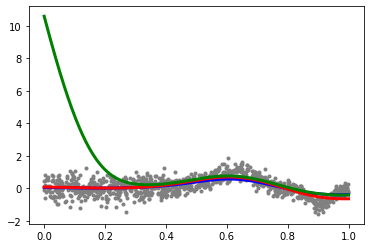

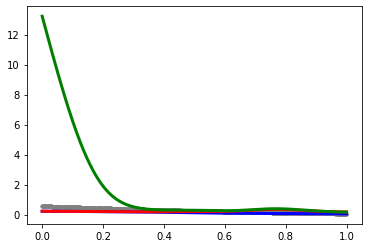

In [1]:
%run regression.ipynb

In [2]:
def diff_vol(h,x,X,y):
    diff = []
    for i in range(1,len(y)):
        diff.append(((y[i]-y[i-1])**2)/2)
    #
    return sum(diff*norm.pdf((x-X[1:(len(X))])/h))/sum(norm.pdf((x-X[1:(len(X))])/h))


    

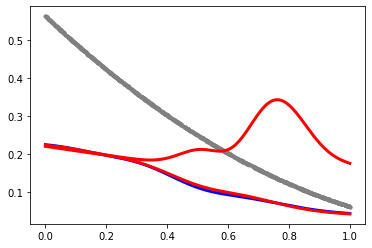

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, sigma(X)**2, 'o', color='grey',markersize=3)
ax.plot(np.linspace(0, 1, n),[nw(h,t,X,r) for t in np.linspace(0, 1, n)],color= 'blue', lw=3)
ax.plot(np.linspace(0, 1, n),[nw(h,t,X,r_hat(t)) for t in np.linspace(0, 1, n)],color= 'red', lw=3)
ax.plot(np.linspace(0, 1, n),[diff_vol(h,t,X,y) for t in np.linspace(0, 1, n)],color= 'red', lw=3)
